**Autor** : Jeferson Magalhães dos Santos

**e-mail**: jefersonmdossantos@gmail.com
    
**github**: jefersonmglh

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [1. Importação de pacotes e dados](#import)
* [2. Análise preliminar](#visualizacao)
* [3. Tratamento](#tratamento)
* [4. Correlação e Associação](#corr)
* [5. Treinamento do modelo de aprendizado](#modelo)
* [6. Avaliação do modelo](#avaliacao)
* [7. Aprimoramento do modelo](#aprimoramento)
* [8. Conclusão](#conclusao)

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

""

#  <a name="import">1. Importação de pacotes e dados </a>
[Voltar ao índice](#indice)

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
path = '/content/drive/MyDrive/Colab Notebooks/spaceship-titanic'

In [223]:
#basic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#graph
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# import chart_studio.plotly as cplt
import plotly.graph_objs as go

#model&metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, f1_score, confusion_matrix
from scipy.stats import chi2, chi2_contingency, iqr, pearsonr
from sklearn.preprocessing import StandardScaler




In [224]:
df_train = pd.read_csv(f'{path}/train.csv')
df_test = pd.read_csv(f'{path}/test.csv')
compose = [df_train, df_test]
print('train-set_head')
df_train.head()

train-set_head


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#  <a name="visualizacao">2. Análise preliminar</a>
[Voltar ao índice](#indice)

In [225]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  

In [226]:
print('TRAIN SET INFO')
show_info(df_train)

TRAIN SET INFO
DATASET SHAPE:  (8693, 14) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

 --------------------

In [227]:
print('TEST SET INFO')
show_info(df_test)

TEST SET INFO
DATASET SHAPE:  (4277, 13) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUE

In [228]:
print('TRAIN SET QUANT INFO')

df_train.describe()

TRAIN SET QUANT INFO


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


MISSING VALUES ON TRAIN SET


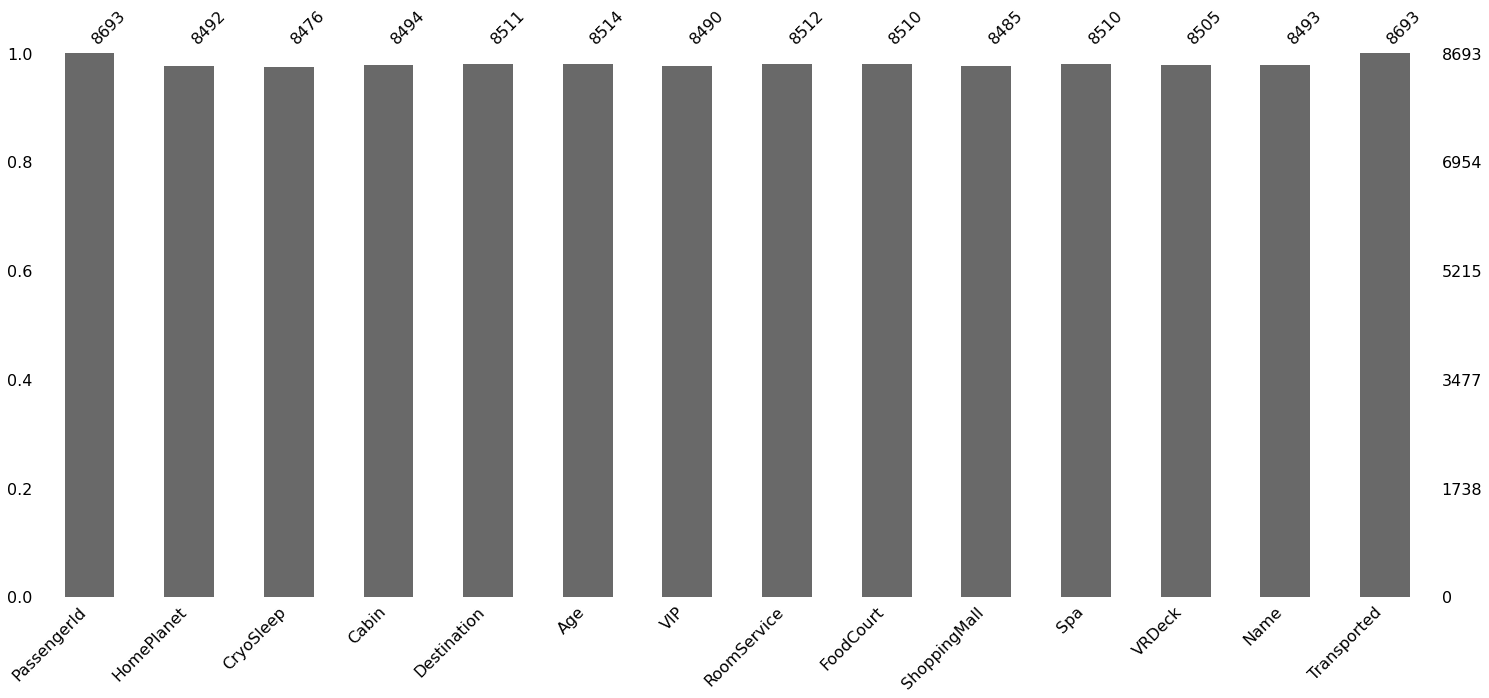

In [229]:
print('MISSING VALUES ON TRAIN SET')
msno.bar(df_train)

MISSING VALUES ON TRAIN SET


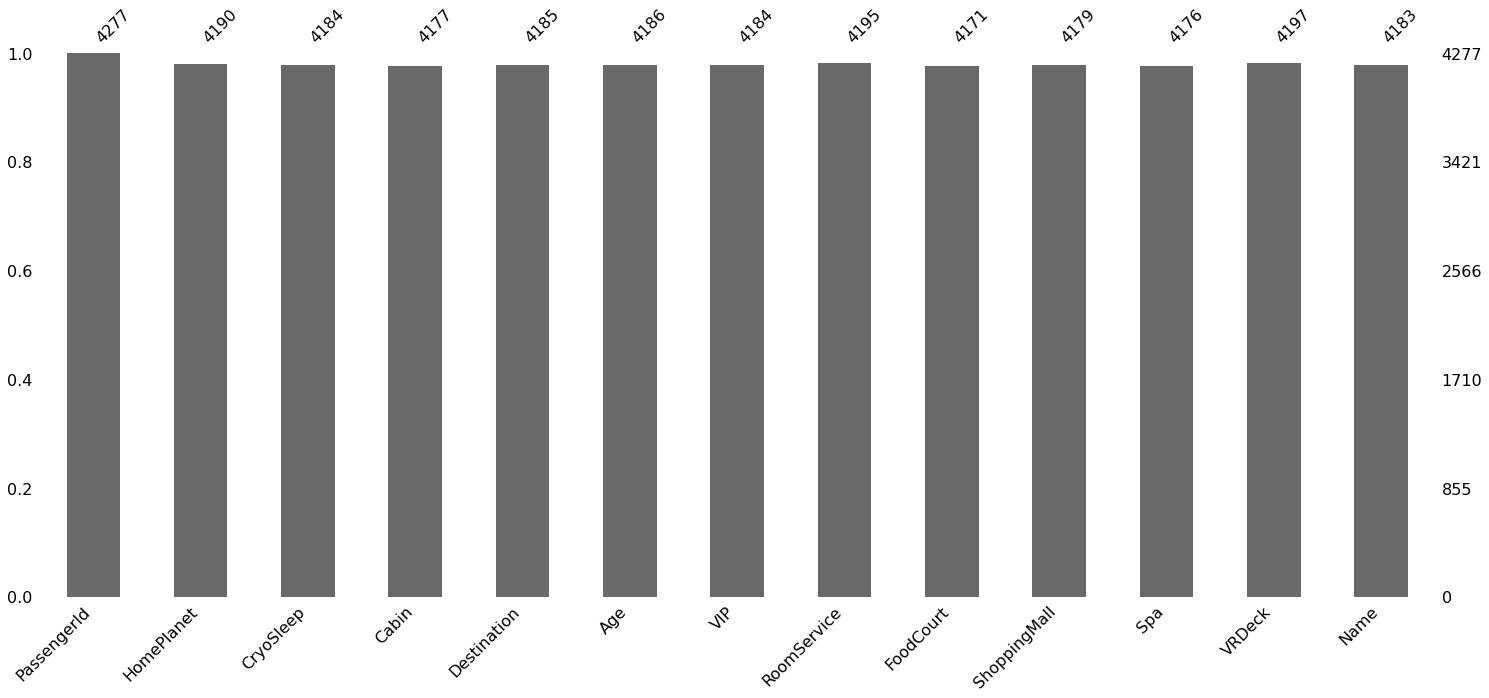

In [230]:
print('MISSING VALUES ON TRAIN SET')
msno.bar(df_test)

Feature descriptions:

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

#  <a name="tratamento">3. Tratamento</a>
[Voltar ao índice](#indice)

* Eliminando variáveis que não serão usadas no modelo.







In [231]:
for df in compose:
  df.drop(columns=['Name'], inplace=True)

In [232]:
df_train.drop(columns=['PassengerId'], inplace=True)

* tratando a feature 'Cabin'.

In [233]:
new_compose = []
for df in compose:
  transf_df = df['Cabin'].str.split('/', expand=True)
  transf_df.rename(columns={
      0:'Cabin_Deck',
      1:'Cabin_Number',
      2:'Cabin_Side'
  }, inplace=True)
  df = pd.concat([df, transf_df], axis=1)

  df.drop(['Cabin'], axis=1, inplace=True)
  new_compose.append(df)

df_train = new_compose[0]
df_test = new_compose[1]

compose = [df_train, df_test]



In [234]:
quanti_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Number']
quali_columns = [x for x in df_train.columns if x not in quanti_columns and x != 'Transported']

target = ['Transported']
features = quanti_columns + quali_columns


Age


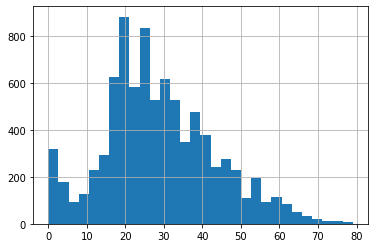

RoomService


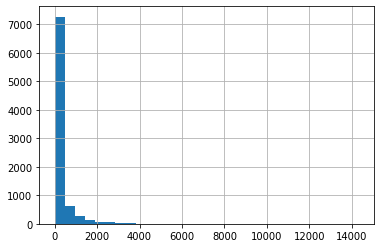

FoodCourt


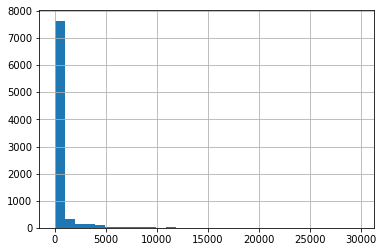

ShoppingMall


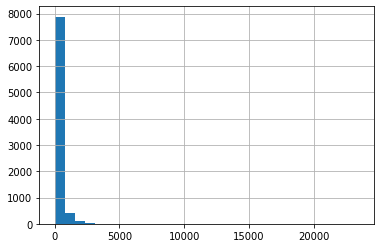

Spa


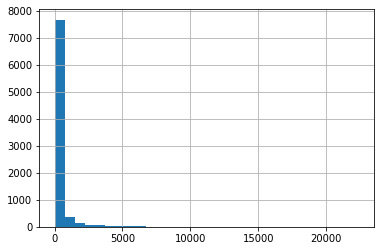

VRDeck


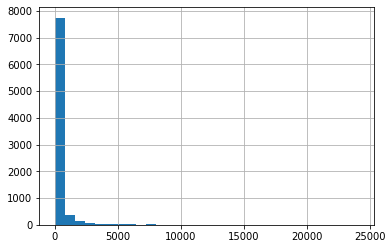

Cabin_Number


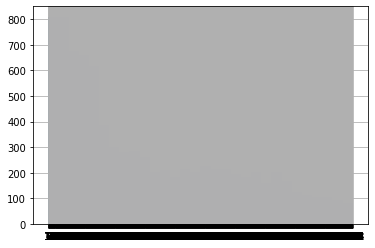

In [235]:
for var_quanti in df_train[quanti_columns]:
  print(var_quanti)
  df_train[var_quanti].hist(bins=30)
  plt.show()

In [236]:
for var_quali in df_train[quali_columns]:
  print(var_quali)
  print(df_train[var_quali].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
VIP
False    8291
True      199
Name: VIP, dtype: int64
Cabin_Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Deck, dtype: int64
Cabin_Side
S    4288
P    4206
Name: Cabin_Side, dtype: int64


* tratanto dos null values



In [237]:
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_Deck      199
Cabin_Number    199
Cabin_Side      199
dtype: int64

In [238]:
df_train.Cabin_Number.mode()

0    82
dtype: object

In [239]:
for v_quanti in quanti_columns:
  print(v_quanti)
  print(df_train[v_quanti].mode())
  df_train[v_quanti].fillna(df_train[v_quanti].mode()[0], inplace=True)


df_train.isnull().sum()

Age
0    24.0
dtype: float64
RoomService
0    0.0
dtype: float64
FoodCourt
0    0.0
dtype: float64
ShoppingMall
0    0.0
dtype: float64
Spa
0    0.0
dtype: float64
VRDeck
0    0.0
dtype: float64
Cabin_Number
0    82
dtype: object


HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_Deck      199
Cabin_Number      0
Cabin_Side      199
dtype: int64

In [240]:
for v_quanti in quanti_columns:
  print(v_quanti)
  print(df_test[v_quanti].mode())
  df_test[v_quanti].fillna(df_test[v_quanti].mode()[0], inplace=True)


df_test.isnull().sum()

Age
0    18.0
dtype: float64
RoomService
0    0.0
dtype: float64
FoodCourt
0    0.0
dtype: float64
ShoppingMall
0    0.0
dtype: float64
Spa
0    0.0
dtype: float64
VRDeck
0    0.0
dtype: float64
Cabin_Number
0    4
dtype: object


PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Cabin_Deck      100
Cabin_Number      0
Cabin_Side      100
dtype: int64

In [241]:
for v_quali in quali_columns:
  print(v_quali)
  print(df_train[v_quali].mode())
  df_train[v_quali].fillna(df_train[v_quali].mode()[0], inplace=True)


df_train.isnull().sum()

HomePlanet
0    Earth
dtype: object
CryoSleep
0    False
dtype: object
Destination
0    TRAPPIST-1e
dtype: object
VIP
0    False
dtype: object
Cabin_Deck
0    F
dtype: object
Cabin_Side
0    S
dtype: object


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_Deck      0
Cabin_Number    0
Cabin_Side      0
dtype: int64

In [242]:
for v_quali in quali_columns:
  print(v_quali)
  print(df_test[v_quali].mode())
  df_test[v_quali].fillna(df_test[v_quali].mode()[0], inplace=True)


df_test.isnull().sum()

HomePlanet
0    Earth
dtype: object
CryoSleep
0    False
dtype: object
Destination
0    TRAPPIST-1e
dtype: object
VIP
0    False
dtype: object
Cabin_Deck
0    F
dtype: object
Cabin_Side
0    S
dtype: object


PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_Deck      0
Cabin_Number    0
Cabin_Side      0
dtype: int64

In [243]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Number,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [244]:
bin_dummie = {
    'True': 1,
    'False': 0
}

for df in compose:
  df['CryoSleep'] = df['CryoSleep'].replace(bin_dummie).astype('int64')
  df['VIP'] = df['VIP'].replace(bin_dummie).astype('int64')
  if len(df) > 5000:
    df['Transported'] = df['Transported'].replace(bin_dummie).astype('int64')


In [245]:
df_train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Number,Cabin_Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [246]:
pd.set_option('max_columns', None)

df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'], dtype='int64')
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'],  dtype='int64')


In [247]:
df_train['Cabin_Number'] = df_train['Cabin_Number'].astype('int64')
df_test['Cabin_Number'] = df_test['Cabin_Number'].astype('int64')

In [248]:
quanti_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Number']
quali_columns = [x for x in df_train.columns if x not in quanti_columns and x != 'Transported']

target = ['Transported']
features = quanti_columns + quali_columns

* UniVar

CryoSleep


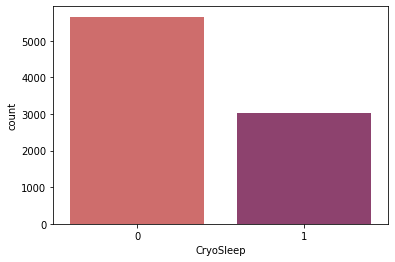

VIP


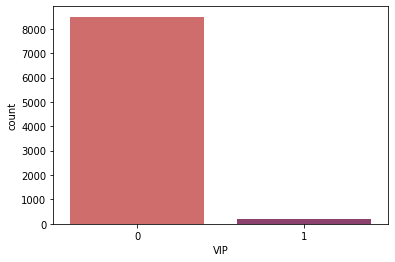

HomePlanet_Earth


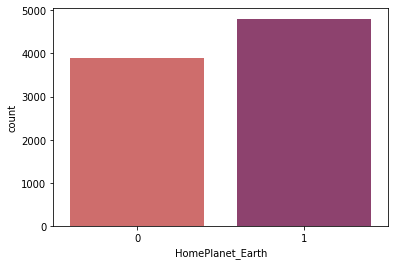

HomePlanet_Europa


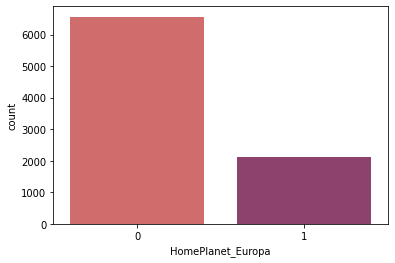

HomePlanet_Mars


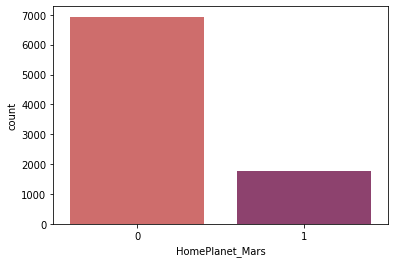

Destination_55 Cancri e


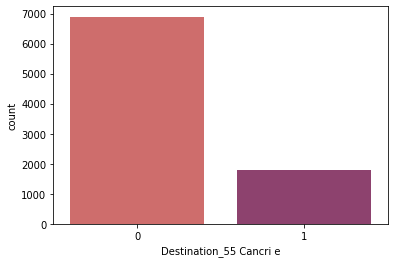

Destination_PSO J318.5-22


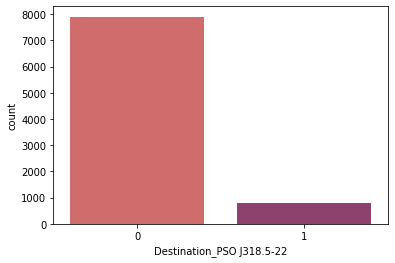

Destination_TRAPPIST-1e


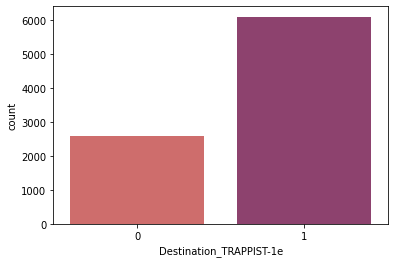

Cabin_Deck_A


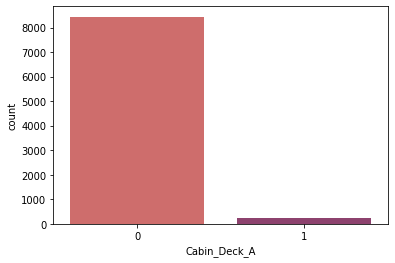

Cabin_Deck_B


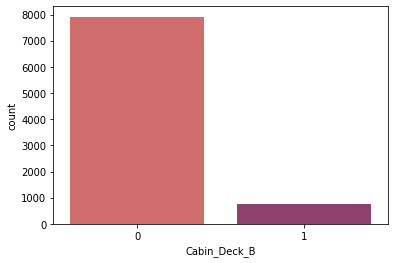

Cabin_Deck_C


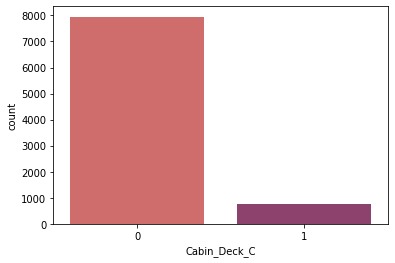

Cabin_Deck_D


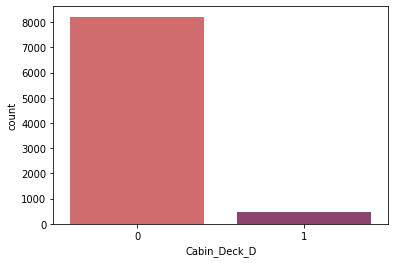

Cabin_Deck_E


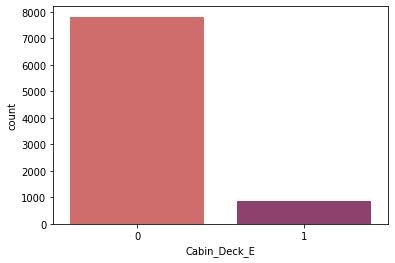

Cabin_Deck_F


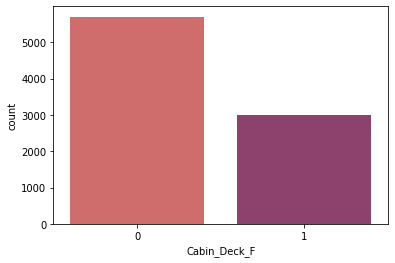

Cabin_Deck_G


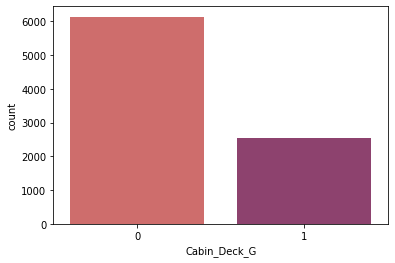

Cabin_Deck_T


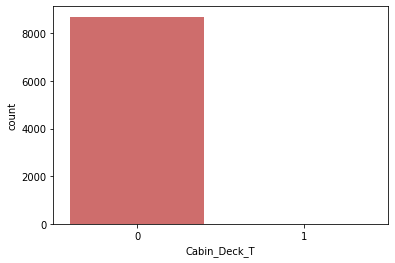

Cabin_Side_P


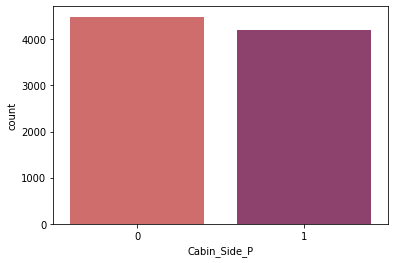

Cabin_Side_S


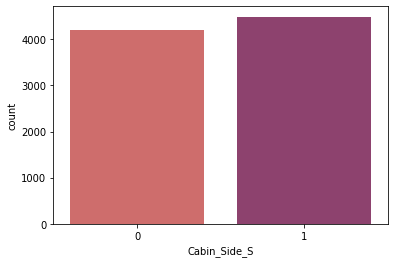

In [249]:
for var_quali in quali_columns:
    print(var_quali)
    sns.countplot(x = df_train[var_quali], palette='flare')
    plt.show()

Age


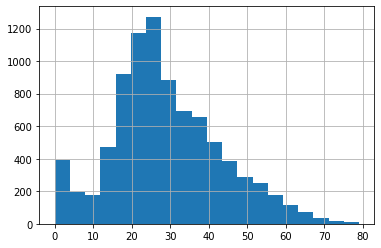

RoomService


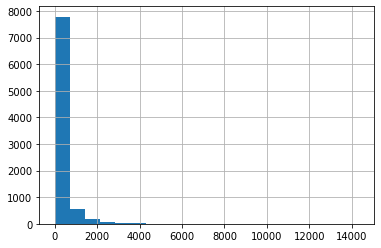

FoodCourt


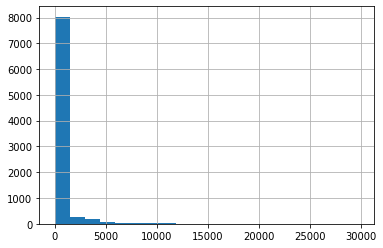

ShoppingMall


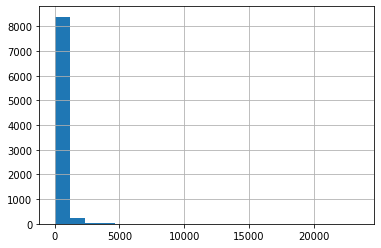

Spa


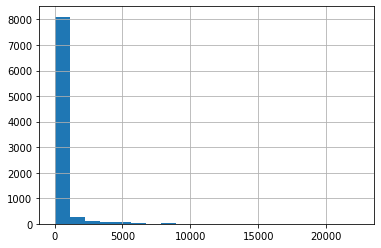

VRDeck


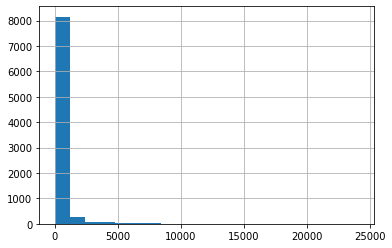

Cabin_Number


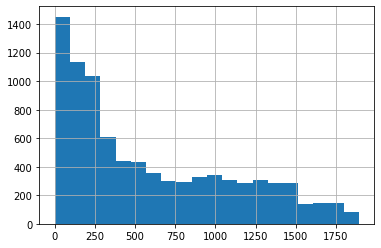

In [250]:
for var_quanti in quanti_columns:
    print(var_quanti)
    df_train[var_quanti].hist(bins=20)
    plt.show()

* BiVar

CryoSleep


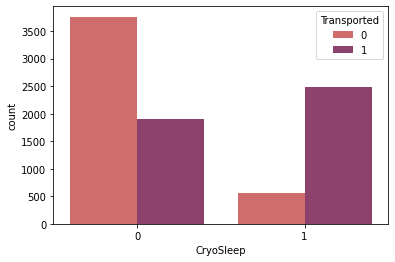

VIP


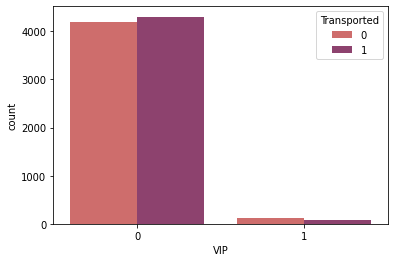

HomePlanet_Earth


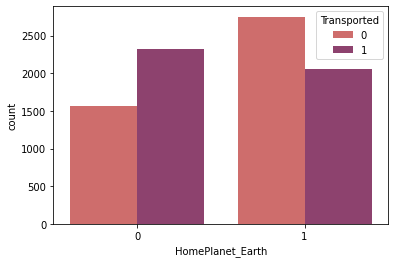

HomePlanet_Europa


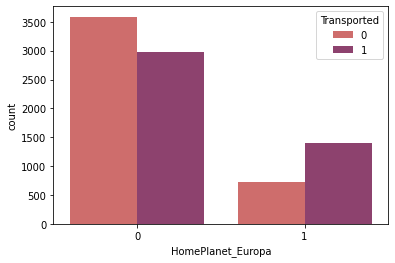

HomePlanet_Mars


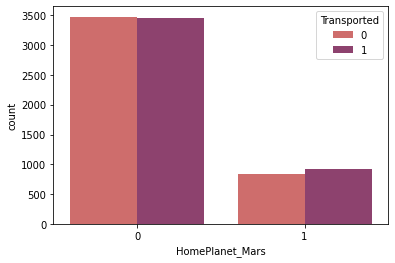

Destination_55 Cancri e


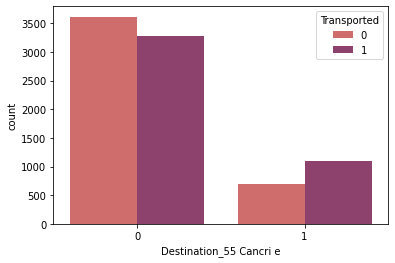

Destination_PSO J318.5-22


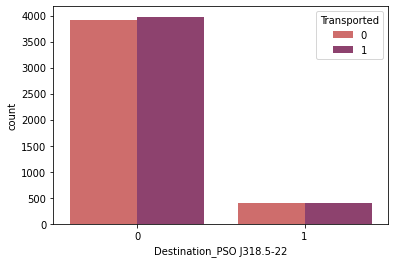

Destination_TRAPPIST-1e


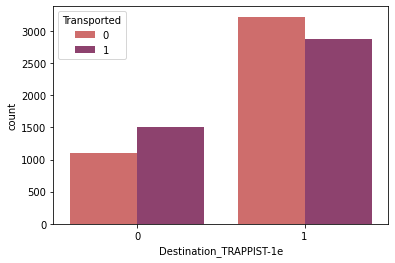

Cabin_Deck_A


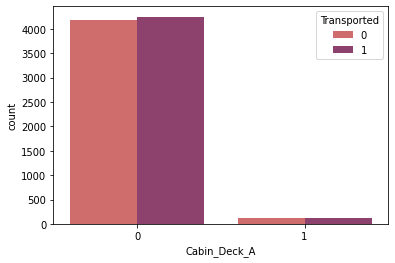

Cabin_Deck_B


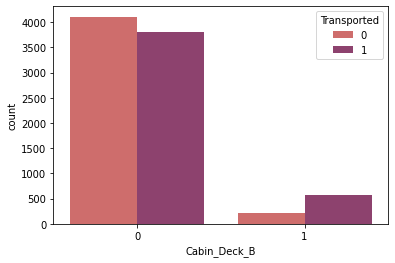

Cabin_Deck_C


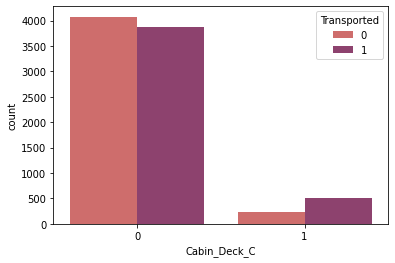

Cabin_Deck_D


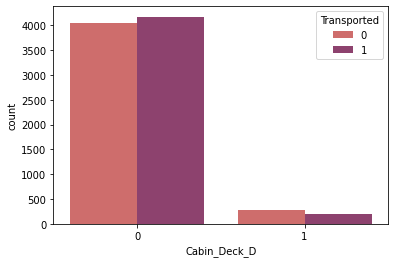

Cabin_Deck_E


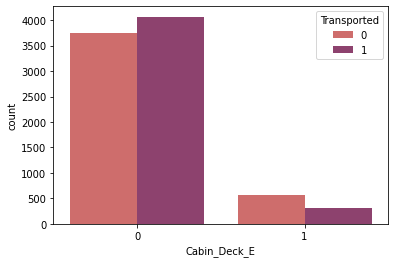

Cabin_Deck_F


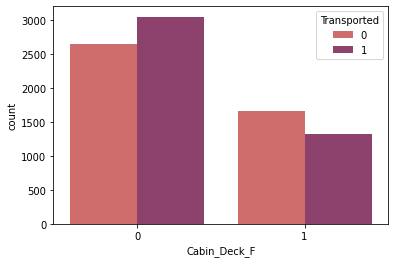

Cabin_Deck_G


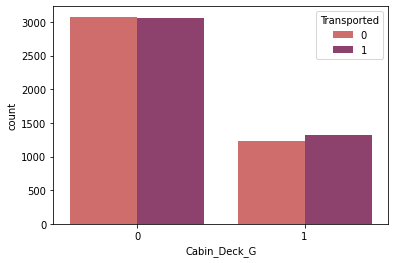

Cabin_Deck_T


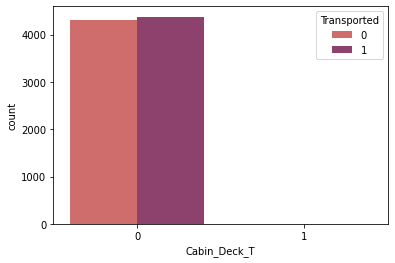

Cabin_Side_P


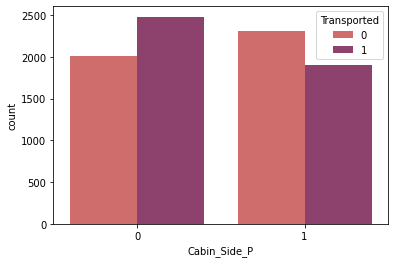

Cabin_Side_S


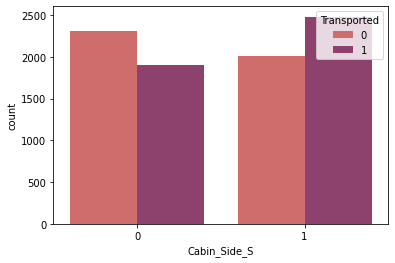

In [251]:
for var_quali in quali_columns:
    print(var_quali)
    sns.countplot(x = df_train[var_quali], hue=df_train['Transported'], palette='flare')
    plt.show()

Age


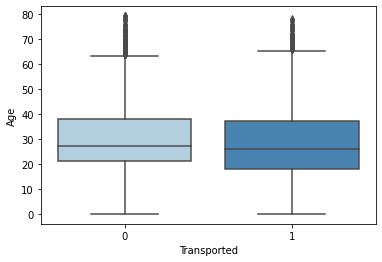

RoomService


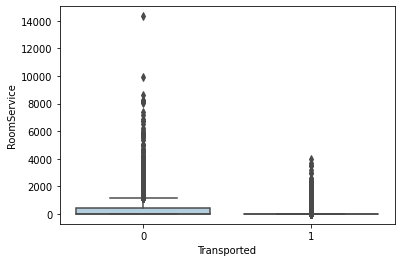

FoodCourt


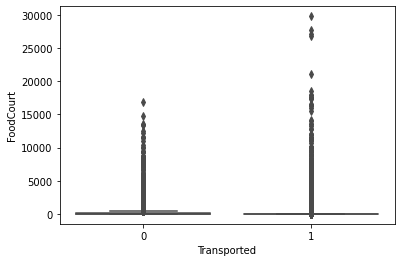

ShoppingMall


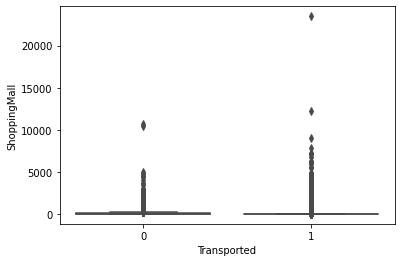

Spa


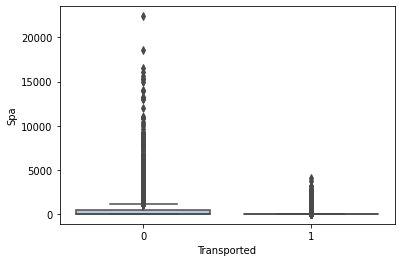

VRDeck


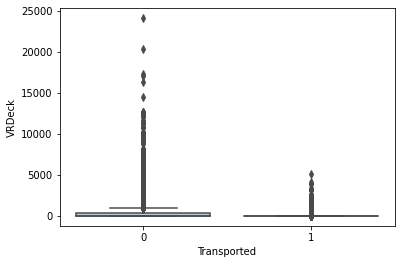

Cabin_Number


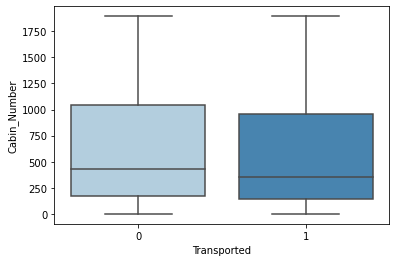

In [252]:
for var_quanti in quanti_columns:
    print(var_quanti)
    sns.boxplot(y=df_train[var_quanti], x='Transported', data=df_train, palette='Blues')
    plt.show()

#  <a name="corr">4. Correlação e associação</a>
[Voltar ao índice](#indice)

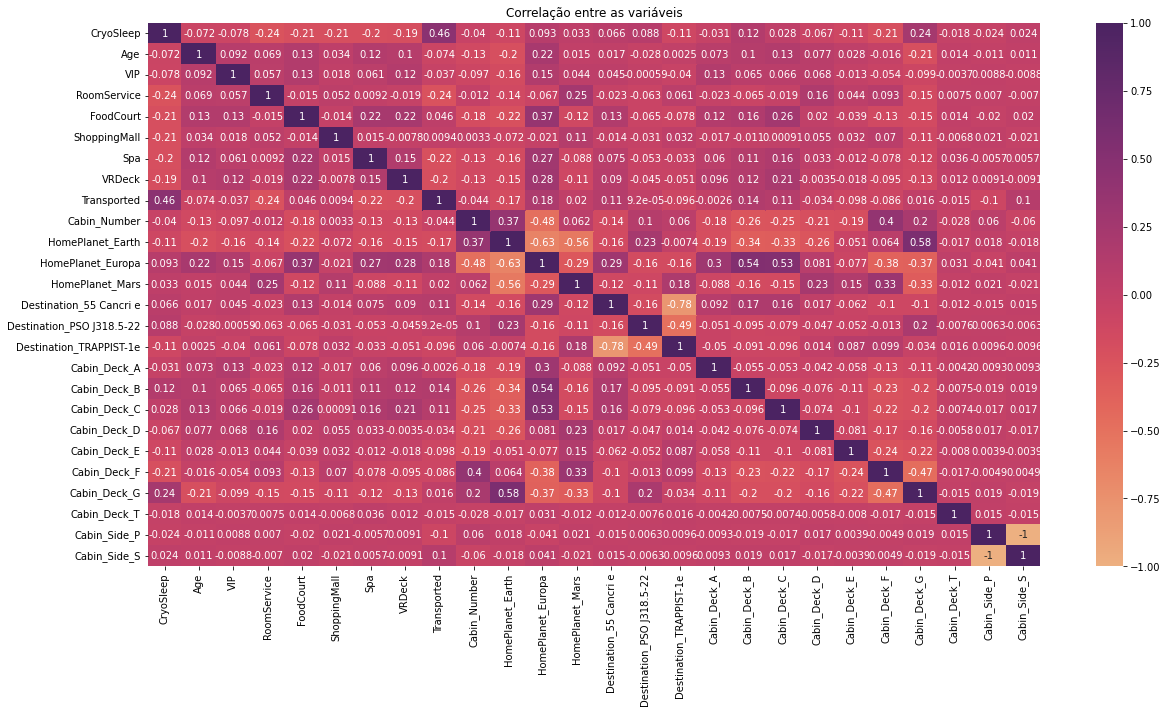

In [253]:
plt.figure(figsize=(20,10))
plt.title('Correlação entre as variáveis')
sns.heatmap(df_train.corr(),cmap='flare', center=0, annot=True)


Vemos que há bastante features que podem ser excluídas.

In [254]:
# plt.figure(figsize=(15,7))
# sns.pairplot(df_train, hue='Transported')
# plt.show()

#  <a name="modelo">5. Treinamento do modelo</a>
[Voltar ao índice](#indice)

In [255]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['Transported']), df_train['Transported'], train_size = 0.7, random_state=3)


In [256]:
from sklearn.ensemble import RandomForestClassifier
def get_max_depth(X_train=X_train,X_val=X_val,y_val=y_val,y_train=y_train):
    max_depth = 0
    acc_score = 0
    for depth in range(1,50):
        clf = RandomForestClassifier(random_state=3, max_depth=depth, n_estimators=100).fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        if acc > acc_score:
            max_depth = depth
            acc_score = acc
        
    return f'max_depth: {max_depth}, acc: {acc_score}'

print(get_max_depth())


max_depth: 17, acc: 0.8090490797546013


In [257]:
from sklearn.model_selection import GridSearchCV
max_leaf_nodes = [528]
params = {'max_leaf_nodes' : max_leaf_nodes, 'max_depth': [11], 'n_estimators': [500,]}
scoring = 'accuracy'
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, params,scoring=scoring, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_val)
print(rf_cv.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'max_depth': 11, 'max_leaf_nodes': 528, 'n_estimators': 500}


#  <a name="avaliacao">6. Avaliação do modelo</a>
[Voltar ao índice](#indice)

In [258]:
len(y_pred)

2608

In [259]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1301
           1       0.81      0.79      0.80      1307

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



Text(91.68, 0.5, 'Predicted')

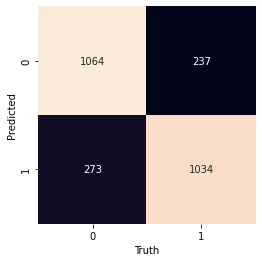

In [260]:
mat = confusion_matrix(y_val, y_pred)

names = np.unique(y_pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

#  <a name="aprimoramento">7. Aprimoramento do modelo</a>
[Voltar ao índice](#indice)

Feature Engineering


In [262]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df_train['Expenditure']=df_train[exp_feats].sum(axis=1)
df_train['No_spending']=(df_train['Expenditure']==0).astype(int)

df_test['Expenditure']=df_test[exp_feats].sum(axis=1)
df_test['No_spending']=(df_test['Expenditure']==0).astype(int)

In [265]:
df_train['Age_group']=np.nan
df_train.loc[df_train['Age']<=12,'Age_group']='Age_0-12'
df_train.loc[(df_train['Age']>12) & (df_train['Age']<18),'Age_group']='Age_13-17'
df_train.loc[(df_train['Age']>=18) & (df_train['Age']<=25),'Age_group']='Age_18-25'
df_train.loc[(df_train['Age']>25) & (df_train['Age']<=30),'Age_group']='Age_26-30'
df_train.loc[(df_train['Age']>30) & (df_train['Age']<=50),'Age_group']='Age_31-50'
df_train.loc[df_train['Age']>50,'Age_group']='Age_51+'



df_test['Age_group']=np.nan
df_test.loc[df_test['Age']<=12,'Age_group']='Age_0-12'
df_test.loc[(df_test['Age']>12) & (df_test['Age']<18),'Age_group']='Age_13-17'
df_test.loc[(df_test['Age']>=18) & (df_test['Age']<=25),'Age_group']='Age_18-25'
df_test.loc[(df_test['Age']>25) & (df_test['Age']<=30),'Age_group']='Age_26-30'
df_test.loc[(df_test['Age']>30) & (df_test['Age']<=50),'Age_group']='Age_31-50'
df_test.loc[df_test['Age']>50,'Age_group']='Age_51+'

In [272]:
aged_dummies_train = pd.get_dummies(df_train['Age_group'])
aged_dummies_test = pd.get_dummies(df_test['Age_group'])

df_train = pd.concat([df_train, aged_dummies_train], axis=1)
df_test = pd.concat([df_test, aged_dummies_test], axis = 1)

In [273]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Number,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S,Expenditure,No_spending,Age_group,Age_0-12,Age_13-17,Age_18-25,Age_26-30,Age_31-50,Age_51+
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.0,1,Age_31-50,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,736.0,0,Age_18-25,0,0,1,0,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,10383.0,0,Age_51+,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,5176.0,0,Age_31-50,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1091.0,0,Age_13-17,0,1,0,0,0,0


Primeiro vamos usar a correlação chi2 para determinar a significância das features.

In [275]:
for var_quali in df_train.columns:
  print(var_quali)
  df_anali = pd.crosstab(df_train['Transported'], df_train[var_quali])


  stat, p, dof, expected = chi2_contingency(df_anali)

  prob = 0.95

  critical = chi2.ppf(prob, dof)

  if abs(stat) >= critical:
    print('Rejeitar H0')
  else:
    print('Não se pode rejeitar H0')

  alpha = 1.0 - prob

  print('significancia=%.3f, p=%.3f' % (alpha, p))

  if p <= alpha:
    print('Rejeitar H0')
  else:
    print('Não se pode rejeitar H0')

CryoSleep
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
Age
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
VIP
Rejeitar H0
significancia=0.050, p=0.001
Rejeitar H0
RoomService
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
FoodCourt
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
ShoppingMall
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
Spa
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
VRDeck
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
Transported
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
Cabin_Number
Rejeitar H0
significancia=0.050, p=0.002
Rejeitar H0
HomePlanet_Earth
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
HomePlanet_Europa
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
HomePlanet_Mars
Não se pode rejeitar H0
significancia=0.050, p=0.073
Não se pode rejeitar H0
Destination_55 Cancri e
Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0
Destination_PSO J318.5-22
Não se pode rejeitar H0
significancia=0.050,

In [276]:
non_signif_feat = ['HomePlanet_Mars', 'Age', 'Age_group', 'Destination_PSO J318.5-22', 'Cabin_Deck_A', 'Cabin_Deck_G', 'Cabin_Deck_F','VIP', 'Cabin_Deck_T', 'Cabin_Number']

In [277]:
df_train.drop(columns=non_signif_feat, inplace=True)
df_test.drop(columns=non_signif_feat, inplace=True)

In [278]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['Transported']), df_train['Transported'], train_size = 0.7, random_state=3)


In [279]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# using .fit_transform() on the train and val data
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

# using only fit for the test data for no leaks
X_test = scaler.transform(df_test.drop(columns=['PassengerId']))

In [281]:
max_leaf_nodes = [4,8,16,32,64,128, 528]
params = {'max_leaf_nodes' : max_leaf_nodes, 'max_depth': [1,2,5,7,11,15, 17, 20], 'n_estimators': [100,200,300,400,500,600,800]}
scoring = 'accuracy'
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, params,scoring=scoring, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_val)
print(rf_cv.best_params_)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
{'max_depth': 20, 'max_leaf_nodes': 528, 'n_estimators': 400}


In [282]:

rf = RandomForestClassifier(max_depth= rf_cv.best_params_.get('max_depth'), max_leaf_nodes= rf_cv.best_params_.get('max_leaf_nodes'), n_estimators= rf_cv.best_params_.get('n_estimators'))
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [283]:
len(y_pred)

2608

In [284]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1301
           1       0.78      0.82      0.80      1307

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



Text(91.68, 0.5, 'Predicted')

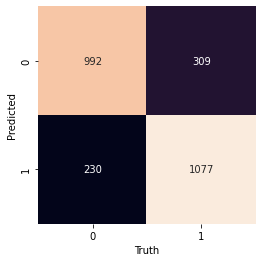

In [285]:
mat = confusion_matrix(y_val, y_pred)

names = np.unique(y_pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [286]:
X_train

array([[0.        , 0.05953794, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05116214, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#  <a name="conclusao">8. Conclusão</a>
[Voltar ao índice](#indice)

In [288]:
df_test.head()

,PassengerId,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Side_P,Cabin_Side_S,Expenditure,No_spending,Age_0-12,Age_13-17,Age_18-25,Age_26-30,Age_31-50,Age_51+
0,0013_01,1,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0.0,1,0,0,0,1,0,0
1,0018_01,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,0,0,1,2832.0,0,0,0,1,0,0,0
2,0019_01,1,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,1,0.0,1,0,0,0,0,1,0
3,0021_01,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,1,0,0,0,1,7418.0,0,0,0,0,0,1,0
4,0023_01,0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,645.0,0,0,0,1,0,0,0


In [289]:
y_test = rf.predict(df_test.drop(columns=['PassengerId']))
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [290]:
y_test_df = pd.Series(y_test)
submission_ = pd.concat([df_test['PassengerId'], y_test_df], axis=1)

In [291]:
submission_.rename(columns={0:'Transported'}, inplace=True)

reverse_bin = {0: 'False', 1: 'True'}
submission_['Transported'] = submission_['Transported'].replace(reverse_bin)
submission_.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [292]:
submission_.to_csv(f'{path}/submission.csv', index=False)